### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [136]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [140]:
print(testY[0:5])

[9 2 1 1 6]


In [141]:
print(trainY[0:5])

[9 0 0 3 0]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [142]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualize the data

Plot first 10 images in the triaining set and their labels.

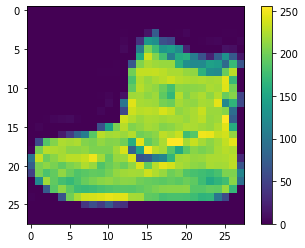

In [144]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()


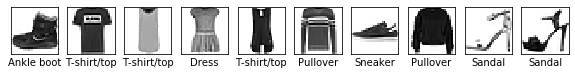

Label for each of above image:
[9 0 0 3 0 2 7 2 5]


In [146]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()
print("Label for each of above image:")
print(trainY[0:9])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [103]:
print(trainX.shape)
print(trainY.shape)

(60000, 28, 28)
(60000, 10)


In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [106]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/sample - loss: 2033.2326 - acc: 0.7401 - val_loss: 1638.6974 - val_acc: 0.7637
Epoch 2/50
60000/60000 [==============================] - 3s 48us/sample - loss: 1637.5253 - acc: 0.7769 - val_loss: 1781.0311 - val_acc: 0.7446
Epoch 3/50
60000/60000 [==============================] - 3s 48us/sample - loss: 1553.4336 - acc: 0.7860 - val_loss: 1929.2948 - val_acc: 0.7651
Epoch 4/50
60000/60000 [==============================] - 3s 47us/sample - loss: 1474.4652 - acc: 0.7911 - val_loss: 1686.8015 - val_acc: 0.7346
Epoch 5/50
60000/60000 [==============================] - 3s 48us/sample - loss: 1501.1157 - acc: 0.7929 - val_loss: 1461.7347 - val_acc: 0.7981
Epoch 6/50
60000/60000 [==============================] - 3s 47us/sample - loss: 1478.4352 - acc: 0.7936 - val_loss: 1078.2669 - val_acc: 0.8005
Epoch 7/50
60000/60000 [==============================] - 3s 47us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Compile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [109]:
model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6012 - acc: 0.7932 - val_loss: 0.5114 - val_acc: 0.8256
Epoch 2/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4914 - acc: 0.8316 - val_loss: 0.4890 - val_acc: 0.8319
Epoch 3/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4695 - acc: 0.8377 - val_loss: 0.4952 - val_acc: 0.8342
Epoch 4/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4565 - acc: 0.8416 - val_loss: 0.4773 - val_acc: 0.8386
Epoch 5/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4487 - acc: 0.8446 - val_loss: 0.4739 - val_acc: 0.8387
Epoch 6/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4446 - acc: 0.8465 - val_loss: 0.4678 - val_acc: 0.8415
Epoch 7/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4397 - acc: 0.8487 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from tensorflow.keras.optimizers import SGD

In [0]:
learning_rate=0.001
sg = SGD(lr=learning_rate)

In [0]:
model1.compile(optimizer=sg, loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3956 - acc: 0.8604 - val_loss: 0.4794 - val_acc: 0.8412
Epoch 2/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3926 - acc: 0.8613 - val_loss: 0.4622 - val_acc: 0.8423
Epoch 3/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3934 - acc: 0.8619 - val_loss: 0.4775 - val_acc: 0.8432
Epoch 4/50
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3933 - acc: 0.8610 - val_loss: 0.4780 - val_acc: 0.8420
Epoch 5/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3942 - acc: 0.8615 - val_loss: 0.4686 - val_acc: 0.8436
Epoch 6/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3942 - acc: 0.8610 - val_loss: 0.4610 - val_acc: 0.8436
Epoch 7/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3927 - acc: 0.8618 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 100 Outputs
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Add Dense Layer which provides 100 Outputs
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))


# Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

## Review model

In [165]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_14 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
dense_31 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


1) **From the above summary table details of each and every layer is provided.**

2) **Total parameters are 92746 among which there are 91178 Trainable parameters and 1568 non_trainable parameters.** 

### Run the model

In [166]:
learning_rate=0.03
sgd = SGD(lr=learning_rate)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 110us/sample - loss: 1.0387 - acc: 0.6900 - val_loss: 0.6311 - val_acc: 0.7780
Epoch 2/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.5679 - acc: 0.7992 - val_loss: 0.5099 - val_acc: 0.8162
Epoch 3/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4876 - acc: 0.8268 - val_loss: 0.4672 - val_acc: 0.8310
Epoch 4/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4521 - acc: 0.8395 - val_loss: 0.4455 - val_acc: 0.8387
Epoch 5/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4302 - acc: 0.8461 - val_loss: 0.4269 - val_acc: 0.8436
Epoch 6/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4127 - acc: 0.8518 - val_loss: 0.4162 - val_acc: 0.8476
Epoch 7/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3989 - acc: 0.8576 - val_l

**1) When only sgd optimizer was used accuracy was less and loss was higher compared with all models**

**2) When Batch Normalization layer was added, accuracy improved and loss became less**

**3) The accuracy further improved and loss become some more minimal as learning rate was added to the layers.**

**4) When more hidden layers with 100 neurons per layer is added and learning rate is also increased, with batch normalization, finally the test accuracy was at 88% with loss being minimal at 34%**
